Our goal for this project is to predict whether a customer would exit a company. We are given various parameters to help determine it.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.drop('customerID',axis='columns',inplace=True)

In [4]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

It is string. let us covert it into numbers..

In [7]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [9]:
df.TotalCharges[488]

' '

In [10]:
df[df.TotalCharges==' '].shape

(11, 20)

So there are 11 rows with such a situation.

In [11]:
df1 = df[df.TotalCharges!=' ']

In [12]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


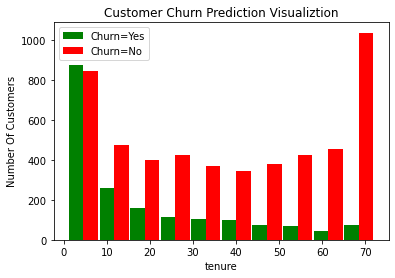

In [13]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

Hence people who are using the service for longer time tend to churn out less.

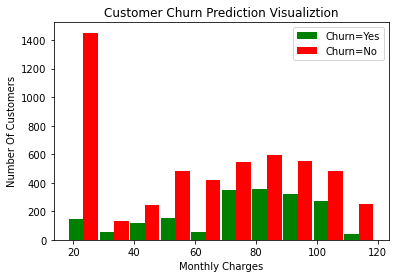

In [14]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

.

Now let us fetch the unique values of all the columns with type object.

In [15]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [16]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [17]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Let us map  the  values yes and no in all the columns.

In [18]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [19]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [20]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])

In [21]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [22]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [23]:
df2[['tenure','MonthlyCharges','TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330
...,...,...,...
7038,0.323944,0.662189,0.227521
7039,1.000000,0.845274,0.847461
7040,0.140845,0.112935,0.037809
7041,0.042254,0.558706,0.033210


In [24]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [25]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [26]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

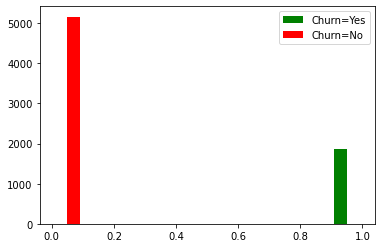

In [27]:
plt.hist([y[y==1],y[y==0]],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [28]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_sm,y_sm,test_size=0.2,random_state=5)

We will now use keras tuner for our ANN Model.

In [30]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout
import kerastuner as kt

<ipython-input-30-c6becbf93c38>:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [31]:
def build_model(hp):
    
    model = Sequential()

    counter = 0

    for i in range(hp.Int('num_layers',min_value=1,max_value=4)):

        if counter == 0:
            model.add(Dense(hp.Int('units' + str(i), min_value=10, max_value=100),
                        activation= hp.Choice('activation' + str(i), values=['relu','tanh']),input_shape=(26,)))
        
            model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
        
        else:

            model.add(Dense(hp.Int('units' + str(i), min_value=10, max_value=100),
                        activation= hp.Choice('activation' + str(i), values=['relu','tanh'])))
       
            model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
              
    counter+=1

    model.add(Dense(1,activation='sigmoid'))

    model.compile(optimizer=hp.Choice('optimizer',values=['rmsprop','adam','sgd','adadelta']),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

def build_model(hp):
    
    model = Sequential()
    
    units = hp.Int('units',min_value = 10,max_value = 100)
    
    model.add(Dense(units, input_shape=(26,), activation='relu')),
    model.add(Dense(units, activation='relu')),
    model.add(Dense(1, activation='sigmoid'))
    
    opt = hp.Choice('optimizer',values = ['adam','sgd','rmsprop','adadelta'])
    
    model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
    return model

In [32]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials = 10,directory='mydir',project_name='tuner churn ann')

In [33]:
tuner.search(X_train, y_train, epochs=50,validation_data=(X_test,y_test))

Trial 10 Complete [00h 00m 29s]
val_accuracy: 0.7899322509765625

Best val_accuracy So Far: 0.8092933297157288
Total elapsed time: 00h 04m 38s
INFO:tensorflow:Oracle triggered exit


In [34]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 2,
 'units0': 80,
 'activation0': 'relu',
 'dropout0': 0.4,
 'optimizer': 'adam',
 'units1': 62,
 'activation1': 'relu',
 'dropout1': 0.4,
 'units2': 32,
 'activation2': 'tanh',
 'dropout2': 0.1,
 'units3': 64,
 'activation3': 'tanh',
 'dropout3': 0.7}

In [35]:
model = tuner.get_best_models(num_models=1)[0]

In [36]:
model_history = model.fit(X_train, y_train, epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
259/259 [==============================] - 1s 3ms/step - loss: 0.3849 - accuracy: 0.8245 - val_loss: 0.4354 - val_accuracy: 0.8025
Epoch 2/50
259/259 [==============================] - 1s 2ms/step - loss: 0.3821 - accuracy: 0.8288 - val_loss: 0.4324 - val_accuracy: 0.8054
Epoch 3/50
259/259 [==============================] - 0s 2ms/step - loss: 0.3847 - accuracy: 0.8289 - val_loss: 0.4354 - val_accuracy: 0.8049
Epoch 4/50
259/259 [==============================] - 1s 2ms/step - loss: 0.3795 - accuracy: 0.8298 - val_loss: 0.4349 - val_accuracy: 0.8083
Epoch 5/50
259/259 [==============================] - 1s 2ms/step - loss: 0.3784 - accuracy: 0.8329 - val_loss: 0.4352 - val_accuracy: 0.8069
Epoch 6/50
259/259 [==============================] - 1s 2ms/step - loss: 0.3805 - accuracy: 0.8298 - val_loss: 0.4306 - val_accuracy: 0.8064
Epoch 7/50
259/259 [==============================] - 1s 2ms/step - loss: 0.3798 - accuracy: 0.8303 - val_loss: 0.4306 - val_accuracy: 0.8078
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


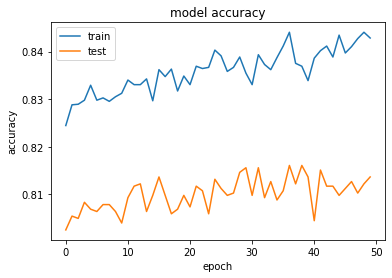

In [37]:
print(model_history.history.keys())

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
yp = model.predict(X_test)
yp[:5]

array([[0.556297  ],
       [0.33950332],
       [0.8926607 ],
       [0.81142175],
       [0.00736433]], dtype=float32)

In [39]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [40]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1025
           1       0.79      0.86      0.82      1041

    accuracy                           0.81      2066
   macro avg       0.82      0.81      0.81      2066
weighted avg       0.82      0.81      0.81      2066



Text(69.0, 0.5, 'Truth')

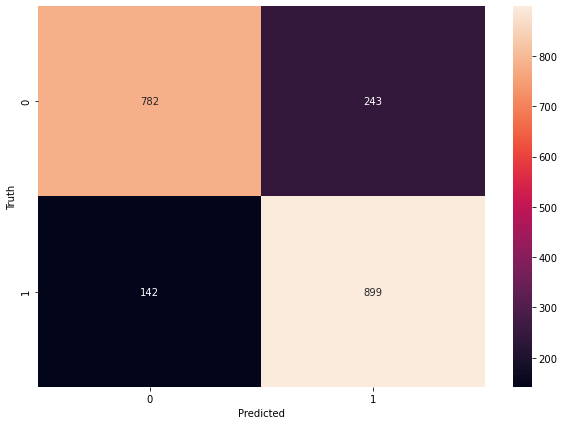

In [41]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')